<a href="https://colab.research.google.com/github/aldodec/Neural_Networks/blob/master/XOR_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

XOR neural network, with simple backpropagation algorithm.

Resources:



*   http://neuralnetworksanddeeplearning.com/chap2.html
*   **Deep Learning**. Ian Goodfellow, Yoshua Bengio, Aaron Courville. MIT Press. 2016.






Initial Weights in Layer 1: [0.5488135  0.71518937] [0.60276338 0.54488318]
Initial Bias in Layer 1: [0.4236548  0.64589411]
Initial Weights in Layer 2: [0.43758721] [0.891773]
Initial Bias in Layer 2: [0.96366276]
Final Weights in Layer 1: [3.70990579 5.78817975] [3.71152914 5.79613693]
Final Bias in Layer 1: [-5.68383638 -2.42012252]
Final Weights in Layer 2: [-8.14942417] [7.50543154]
Final Bias in Layer 2: [-3.37838205]
Final Output: [0.05769471] [0.94702856] [0.94700356] [0.05711666]


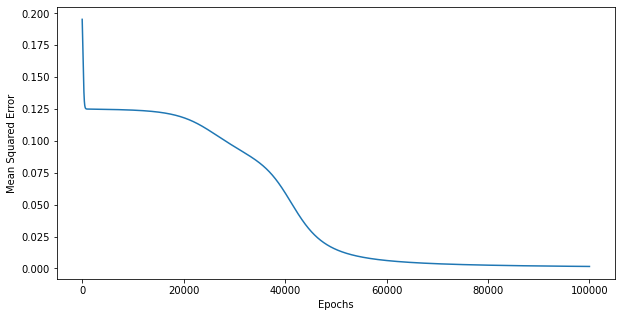

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)


X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])


def sigmoid(x):
  return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
  return x*(1-x)


neurons_in, neurons_1, neurons_2 = 2,2,1

weights_1 = np.random.uniform(size=(neurons_in,neurons_1))
bias_1 = np.random.uniform(size=(1,neurons_1))

weights_2 = np.random.uniform(size=(neurons_1,neurons_2))
bias_2 = np.random.uniform(size=(1,neurons_2))


print('Initial Weights in Layer 1: ',end='')
print(*weights_1)
print('Initial Bias in Layer 1: ',end='')
print(*bias_1)
print('Initial Weights in Layer 2: ',end='')
print(*weights_2)
print('Initial Bias in Layer 2: ',end='')
print(*bias_2)
print(20*'===')

epochs = 100000
lr = 0.01

error_list = []

for epoch in range(epochs):

  # Forward Propagation
  weighted_input_1 = np.dot(X,weights_1) + bias_1
  activation_1 = sigmoid(weighted_input_1)
  weighted_input_2 = np.dot(activation_1,weights_2) + bias_2
  activation_2 = sigmoid(weighted_input_2)

  # Errors
  layer2_error = (y - activation_2)*(sigmoid_derivative(activation_2))
  layer1_error  = np.dot(layer2_error,weights_2.T)*sigmoid_derivative(activation_1)

  # Nablas
  nabla_weights_2 = np.dot(activation_1.T,layer2_error)
  nabla_bias_2 = np.sum(layer2_error,axis=0,keepdims=True)
  nabla_weights_1 = np.dot(X.T,layer1_error)
  nabla_bias_1 = np.sum(layer1_error,axis=0,keepdims=True)

  # Backpropagation
  weights_2 += nabla_weights_2 * lr
  weights_1 += nabla_weights_1 * lr
  bias_2 += nabla_bias_2 * lr
  bias_1 += nabla_bias_1 * lr

  error_list.append(np.sum((y - activation_2)**2)/8)


print('Final Weights in Layer 1: ',end='')
print(*weights_1)
print('Final Bias in Layer 1: ',end='')
print(*bias_1)
#print(20*'===')
print('Final Weights in Layer 2: ',end='')
print(*weights_2)
print('Final Bias in Layer 2: ',end='')
print(*bias_2)
print(20*'===')
print('Final Output: ',end='')
print(*activation_2)
print(20*'===')


plt.figure(figsize=(10,5))
plt.plot(error_list)
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()
